In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
import geopandas as gpd
%matplotlib inline

### Let's start by loading the Excel spreadsheets into pandas DataFrames. 

In [3]:
data_path = './data'
act = pd.read_excel(f'{data_path}/ACT.xlsx')
act_disag = pd.read_excel(f'{data_path}/ACT_DESAGREGADO.xlsx')
adherence = pd.read_excel(f'{data_path}/Adherencia.xlsx')
familiar_records = pd.read_excel(f'{data_path}/Antecedentes_familiares.xlsx')
pathological_records = pd.read_excel(f'{data_path}/Antecedentes_patologicos.xlsx')
diagnostics_aids = pd.read_excel(f'{data_path}/Ayudas_diagnosticas.xlsx')
biologics_asthma = pd.read_excel(f'{data_path}/Biologicos Asma.xlsx')
life_quality = pd.read_excel(f'{data_path}/Calidad de vida relacioada en salud.xlsx')
basic_info = pd.read_excel(f'{data_path}/Datos basicos.xlsx')
dyspnea = pd.read_excel(f'{data_path}/Disnea.xlsx')
ram_pharmacovigilance = pd.read_excel(f'{data_path}/Farmacovigilancia RAM.xlsx')
habits = pd.read_excel(f'{data_path}/Habitos.xlsx')
hospitalizations = pd.read_excel(f'{data_path}/Hospitalizaciones.xlsx')
collecting_issues = pd.read_excel(f'{data_path}/Incosistencias en reclamacion.xlsx')
medicines = pd.read_excel(f'{data_path}/Medicamentos.xlsx')
height_weight = pd.read_excel(f'{data_path}/Mediciones de peso y talla.xlsx')
emergencies = pd.read_excel(f'{data_path}/Urgencias.xlsx')
vaccines = pd.read_excel(f'{data_path}/Vacunacion.xlsx')

### Datos basicos

In [4]:
basic_info.head()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
0,500547,58.0,M,SECUNDARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19 00:00:00
1,500588,15.0,M,PRIMARIA,SOLTERO (A),NaN,CUNDINAMARCA,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19 00:00:00
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06 00:00:00
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15 00:00:00


In [5]:
basic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 17 columns):
ID                     888 non-null int64
edad                   887 non-null float64
genero                 886 non-null object
escolaridad            877 non-null object
EstadoCivil            878 non-null object
Preferencia            202 non-null object
Departamento           886 non-null object
Ciudad                 886 non-null object
Estrato                887 non-null float64
Zona                   887 non-null object
AcompaÃ±ante           861 non-null object
NivelSocioEconomico    871 non-null object
Ocupacion              861 non-null object
Regimen                861 non-null object
TipoAfiliacion         861 non-null object
RelacionLaboral        861 non-null object
FE_NACIMIENTO          887 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 118.0+ KB


In [6]:
basic_info.describe(include='all')

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
count,8.880000e+02,887.000000,886,877,878,202,886,886,887.000000,887,861,871,861,861,861,861,887
unique,NaN,NaN,2,8,6,3,12,52,NaN,2,10,6,8,4,3,5,861
top,NaN,NaN,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,NaN,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2004-05-12 00:00:00
freq,NaN,NaN,617,390,420,192,703,470,NaN,853,531,637,463,837,536,477,3
mean,1.259328e+06,40.839910,NaN,NaN,NaN,NaN,NaN,NaN,2.985344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.326579e+05,18.356553,NaN,NaN,NaN,NaN,NaN,NaN,0.867529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.005470e+05,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.900988e+05,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.254720e+06,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.645597e+06,55.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


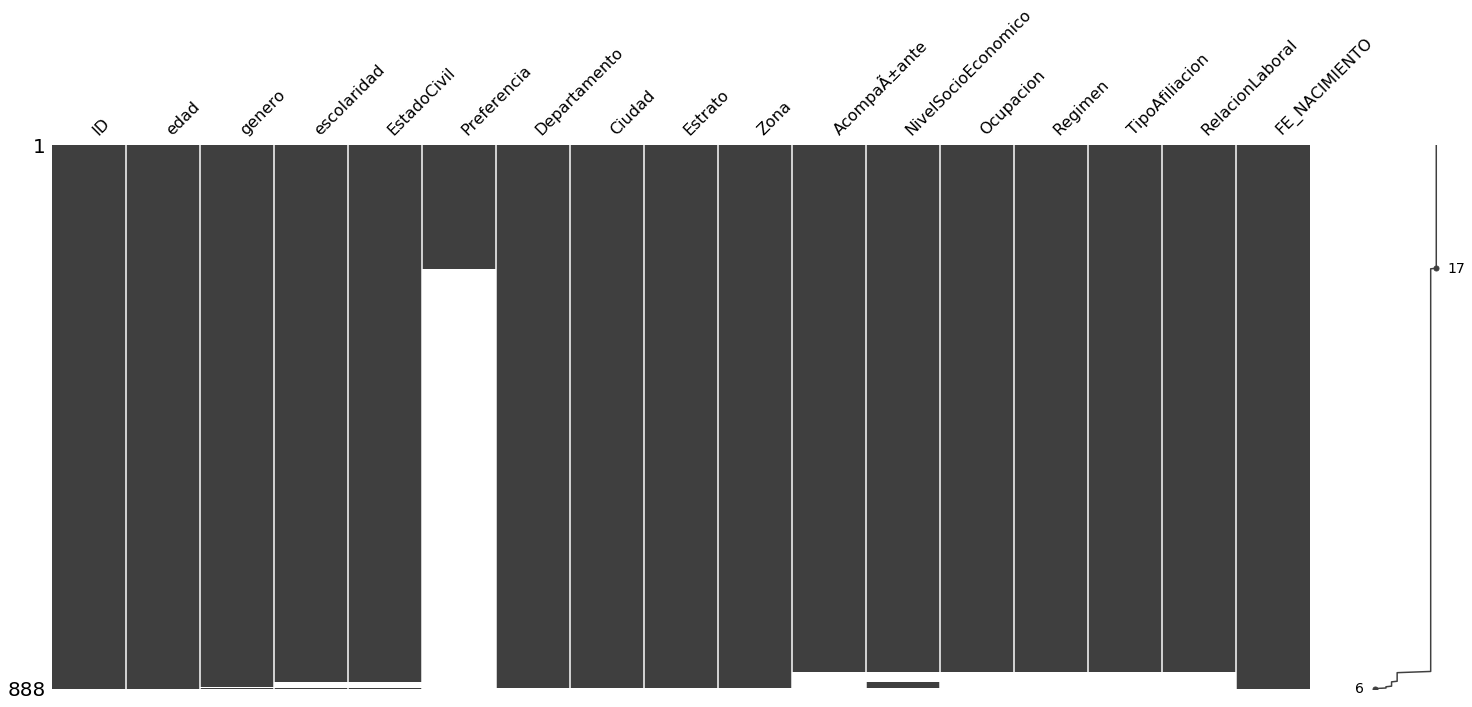

In [7]:
msno.matrix(msno.nullity_sort(basic_info, sort='descending'))

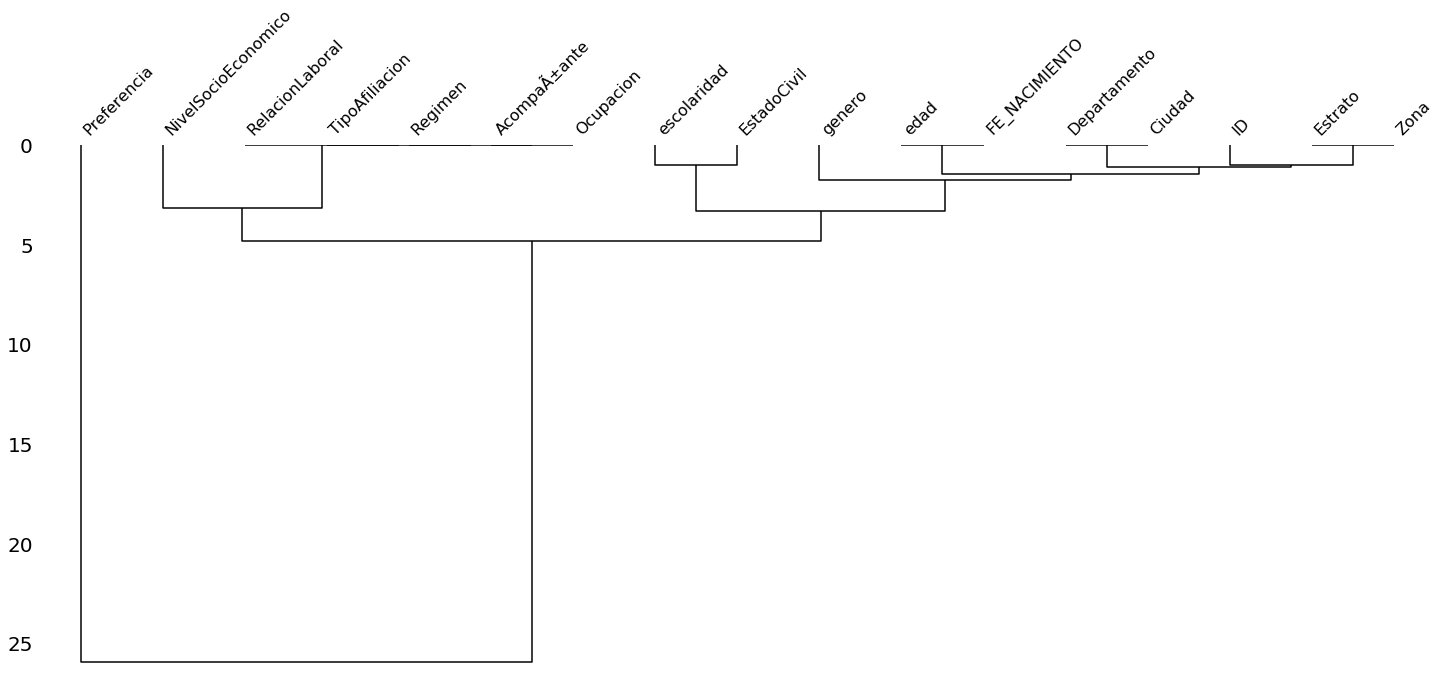

In [8]:
msno.dendrogram(basic_info)

In [9]:
basic_info.groupby('genero').count()

,ID,edad,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
genero,,,,,,,,,,,,,,,,
F,617,616,610,611,146,615,615,616,616,600,606,600,600,600,600,616
M,269,269,267,267,56,269,269,269,269,261,263,261,261,261,261,269


In [10]:
basic_info.groupby('Zona').count()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
Zona,,,,,,,,,,,,,,,,
RURAL,34,34,34,34,34,8,34,34,34,33,33,33,33,33,33,34
URBANA,853,852,851,842,843,194,852,852,853,828,838,828,828,828,828,852


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:2396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff174e97eb8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff174defac8>], dtype=object)

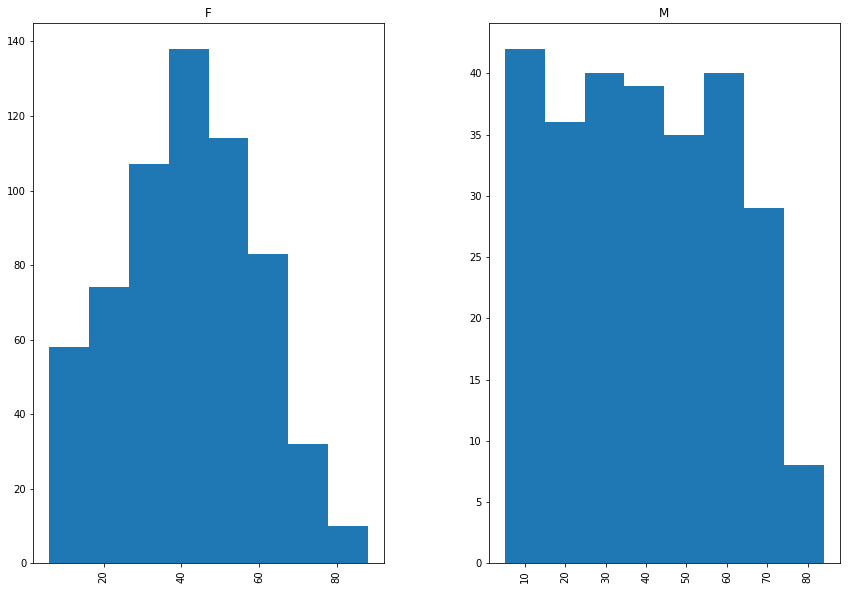

In [11]:
fig, ax = plt.subplots(figsize=(14,10))
basic_info[['edad','genero']].hist(by='genero', bins=8, ax=ax)

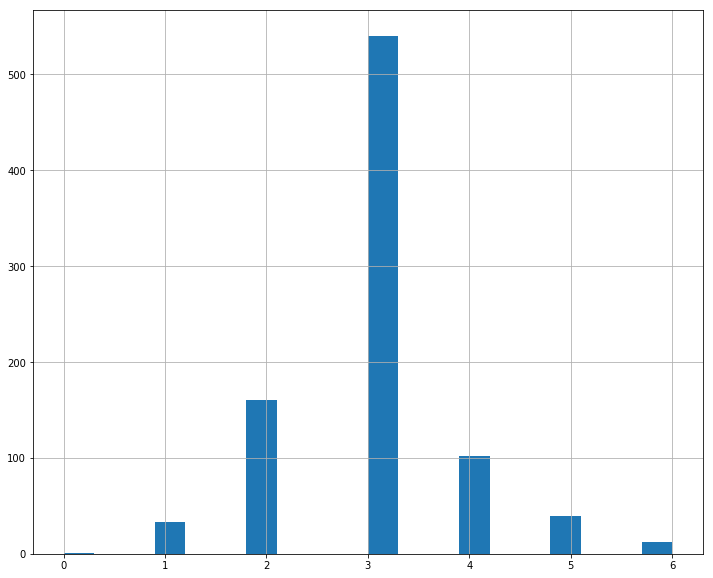

In [12]:
plt.figure(figsize=(12,10))
basic_info['Estrato'].hist(bins=20)

In [13]:
count_per_mpio = basic_info[['ID', 'Ciudad']].groupby('Ciudad').count().reset_index()
count_per_mpio.head()

,Ciudad,ID
0,ANDES,1
1,ANTIOQUIA,5
2,ARMENIA,4
3,BARBOSA,1
4,BARRANQUILLA,48


In [14]:
count_per_depto = basic_info[['ID', 'Departamento']].groupby('Departamento').count().reset_index()
count_per_depto.loc[count_per_depto['Departamento'] == 'VALLE', 'Departamento'] = "VALLE DEL CAUCA" # VALLE -> VALLE DEL CAUCA
count_per_depto

,Departamento,ID
0,ANTIOQUIA,703
1,ARMENIA QUINDIO,1
2,ATLANTICO,53
3,BOLIVAR,2
4,CALDAS,28
5,CUNDINAMARCA,40
6,MAGDALENA,1
7,MEDELLIN,6
8,PEREIRA,3
9,QUINDIO,4


In [15]:
mpios_colombia_url = 'https://raw.githubusercontent.com/santiblanko/colombia.geojson/master/mpio.json'
deptos_colombia_url = 'https://raw.githubusercontent.com/santiblanko/colombia.geojson/master/depto.json'
coords = [7.1986, -75.3412]

In [16]:
deptos_gdf = gpd.read_file(deptos_colombia_url)
deptos_gdf.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,POLYGON ((-76.30393314122961 8.616514809855945...
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,POLYGON ((-74.86716728669083 10.35842774071002...
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,POLYGON ((-74.01948861243253 4.792254432176655...
3,13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15607875564588 10.420831662843, ..."
4,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.2095112233977 7.024662781962941,..."


In [17]:
merge_count_deptos = deptos_gdf.merge(count_per_depto, how='left', left_on='NOMBRE_DPT', right_on='Departamento').fillna(0)

In [18]:
m = folium.Map(
    location=coords,
    tiles='CartoDB positron',
    zoom_start=7  # Limited levels of zoom for free Mapbox tiles.
)

tooltip = folium.GeoJsonTooltip(
    fields=["NOMBRE_DPT", "ID"],
    aliases=["Departamento:", "Número pacientes:"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


# choropleth = folium.Choropleth(
#     geo_data=mpios_colombia_url,
#     name='choropleth',
#     data=count_per_mpio,
#     columns=['Ciudad', 'ID'],
#     key_on='feature.properties.NOMBRE_MPI',
#     nan_fill_color='white',
#     nan_fill_opacity=0.7,
#     fill_color='YlGn',
#     fill_opacity=0.9,
#     line_opacity=0.2,
#     highlight=True,
#     tooltip=tooltip,
#     legend_name='Count'
# ).add_to(m)

choropleth = folium.Choropleth(
    geo_data=merge_count_deptos,
    name='choropleth',
    data=count_per_depto,
    columns=['Departamento', 'ID'],
    key_on='feature.properties.NOMBRE_DPT',
    nan_fill_color='white',
    nan_fill_opacity=0.7,
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.2,
    highlight=True,
    legend_name='Patient count per Department'
).add_to(m)

choropleth.geojson.add_child(
    tooltip
)

m

### Calidad de vida

In [19]:
life_quality.head()

,Identificacion,FE_ALTA,Dimensiones,0_100
0,1645342,2016-09-27,Entorno,75.0
1,1645342,2016-09-27,Psicologico,81.0
2,1645342,2016-09-27,Relaciones interpersonales,100.0
3,1645342,2016-09-27,Salud fisica,25.0
4,1645342,2017-12-21,Entorno,63.0


In [20]:
life_quality.describe(include='all')

,Identificacion,FE_ALTA,Dimensiones,0_100
count,1.016000e+03,1016,1016,1012.000000
unique,NaN,175,4,NaN
top,NaN,2017-03-06 00:00:00,Entorno,NaN
freq,NaN,32,254,NaN
first,NaN,2014-11-04 00:00:00,NaN,NaN
last,NaN,2019-02-21 00:00:00,NaN,NaN
mean,1.258658e+06,NaN,NaN,67.318182
std,4.093158e+05,NaN,NaN,18.585210
min,5.029890e+05,NaN,NaN,6.000000
25%,9.165100e+05,NaN,NaN,56.000000


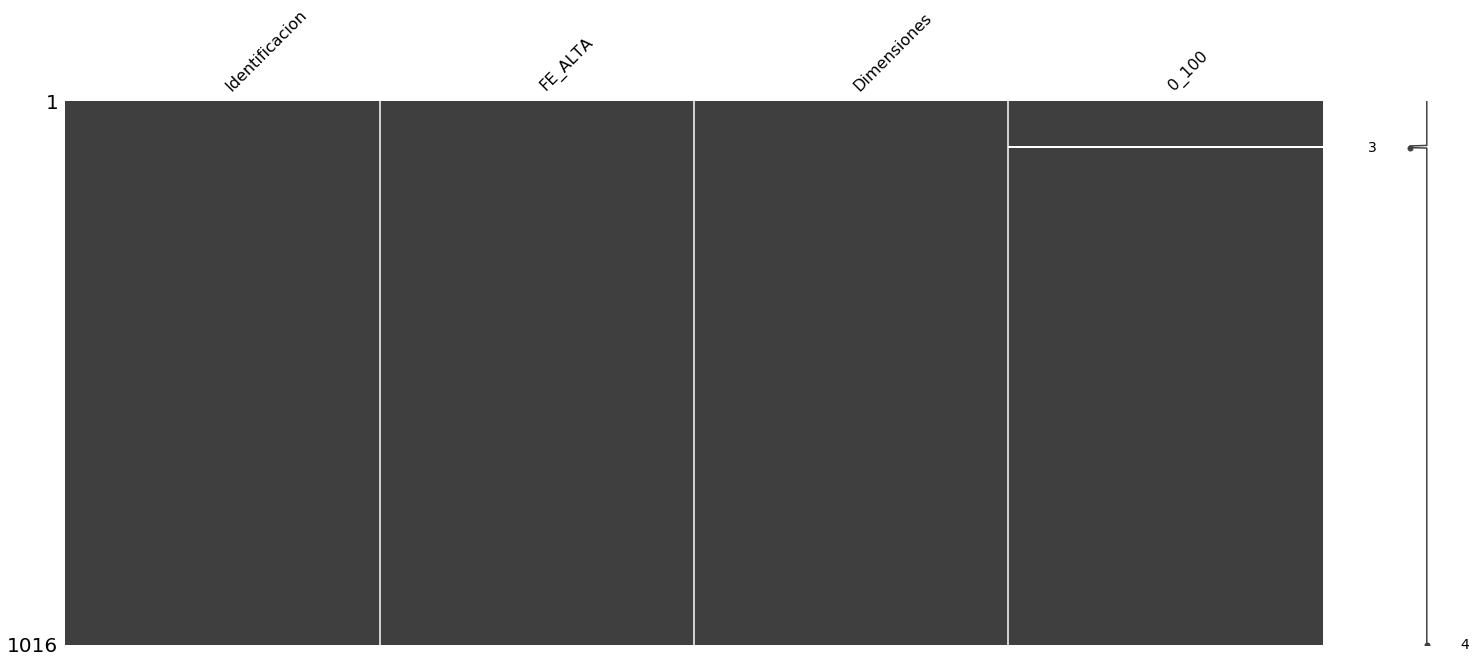

In [21]:
msno.matrix(life_quality)

### ACT and ACT_DESAGREGADO

#### ACT

In [22]:
act.head()

,ID,DS_NOMBRE,NM_PUNTAJE,DS_RESULTADO,FE_RESULTADO
0,502989,Prueba de control del Asma ACT,24,NO totalmente controlada,2014-10-28 13:24:49
1,502989,Prueba de control del Asma ACT,24,NO totalmente controlada,2014-10-28 13:24:49
2,502989,Prueba de control del Asma ACT,24,NO totalmente controlada,2014-10-28 13:24:49
3,502989,Prueba de control del Asma ACT,24,NO totalmente controlada,2014-10-28 13:24:49
4,502989,Prueba de control del Asma ACT,24,NO totalmente controlada,2014-10-28 13:24:49


In [23]:
act.describe(include='all')

,ID,DS_NOMBRE,NM_PUNTAJE,DS_RESULTADO,FE_RESULTADO
count,1.509000e+04,15090,15090.000000,15090,15090
unique,NaN,1,NaN,3,1710
top,NaN,Prueba de control del Asma ACT,NaN,no esta controlada,2020-05-07 11:00:44
freq,NaN,15090,NaN,6926,26
first,NaN,NaN,NaN,NaN,2014-02-03 08:22:16
last,NaN,NaN,NaN,NaN,2020-06-01 13:23:26
mean,1.233654e+06,NaN,18.682174,NaN,NaN
std,4.158423e+05,NaN,5.118515,NaN,NaN
min,5.029890e+05,NaN,5.000000,NaN,NaN
25%,8.862610e+05,NaN,16.000000,NaN,NaN


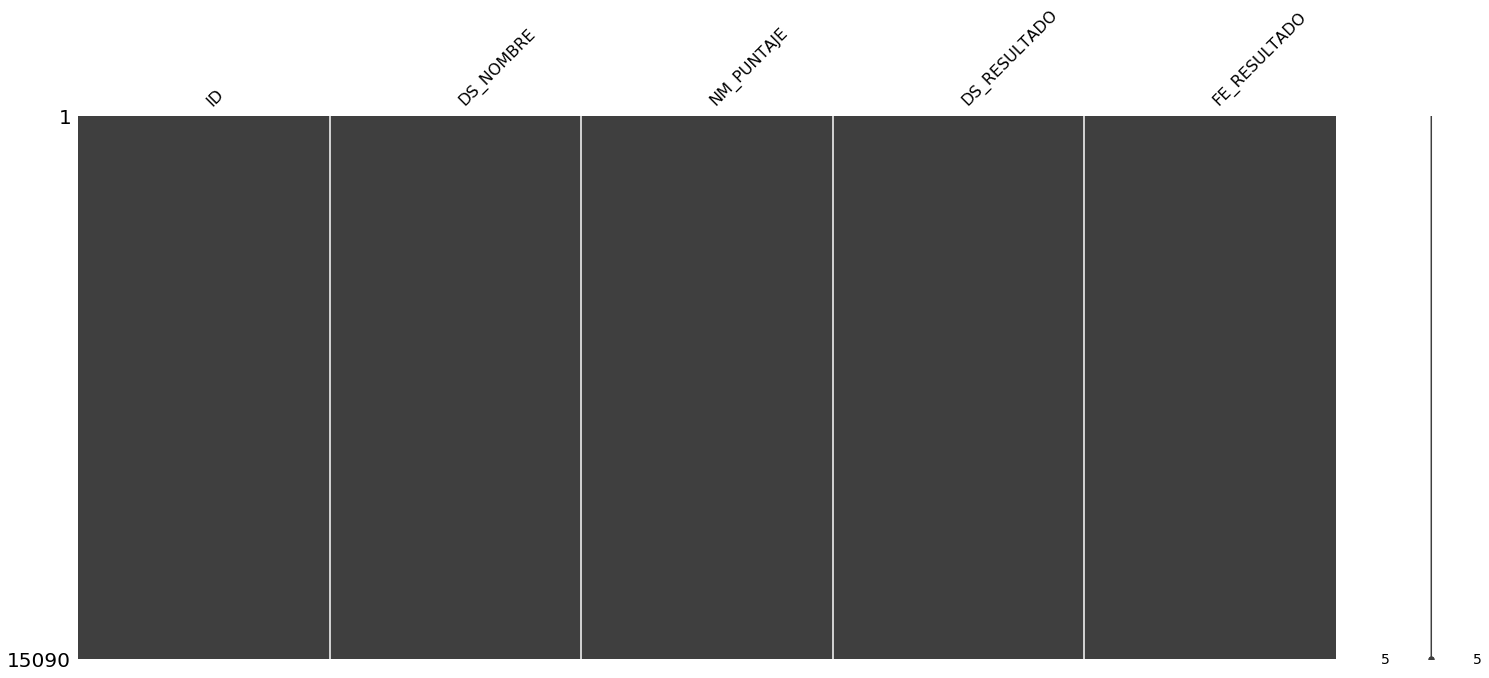

In [24]:
msno.matrix(act)

#### ACT_DESAGREGADO

In [25]:
act_disag.head()

,NUMERO IDENTIFICACION,NOMBRE ENCUESTA,PREGUNTA,RESPUESTA,FE_RESULTADO
0,535255,Prueba de control del Asma ACT,DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUEN...,POCAS VECES,2012-06-29
1,535255,Prueba de control del Asma ACT,DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUEN...,1 O 2 VECES A LA SEMANA,2012-06-29
2,535255,Prueba de control del Asma ACT,DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUEN...,DE 2 A 3 NOCHES EN A LA SEMANA,2012-06-29
3,535255,Prueba de control del Asma ACT,DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUEN...,1 VEZ A LA SEMANA O MENOS,2012-06-29
4,535255,Prueba de control del Asma ACT,¿COMO CALIFICARIA EL CONTROL DE SU ASMA DURANT...,BIEN CONTROLADA,2012-06-29


In [26]:
act_disag.describe(include='all')

,NUMERO IDENTIFICACION,NOMBRE ENCUESTA,PREGUNTA,RESPUESTA,FE_RESULTADO
count,8.602000e+03,8602,8602,8602,8602
unique,NaN,1,32,31,526
top,NaN,Prueba de control del Asma ACT,DURANTE LAS ULTIMAS 4 SEMANAS ¿CON QUE FRECUEN...,NUNCA,2018-09-20 00:00:00
freq,NaN,8602,1715,2676,325
first,NaN,NaN,NaN,NaN,2012-06-29 00:00:00
last,NaN,NaN,NaN,NaN,2020-05-29 00:00:00
mean,1.254126e+06,NaN,NaN,NaN,NaN
std,4.153052e+05,NaN,NaN,NaN,NaN
min,5.029890e+05,NaN,NaN,NaN,NaN
25%,9.036320e+05,NaN,NaN,NaN,NaN


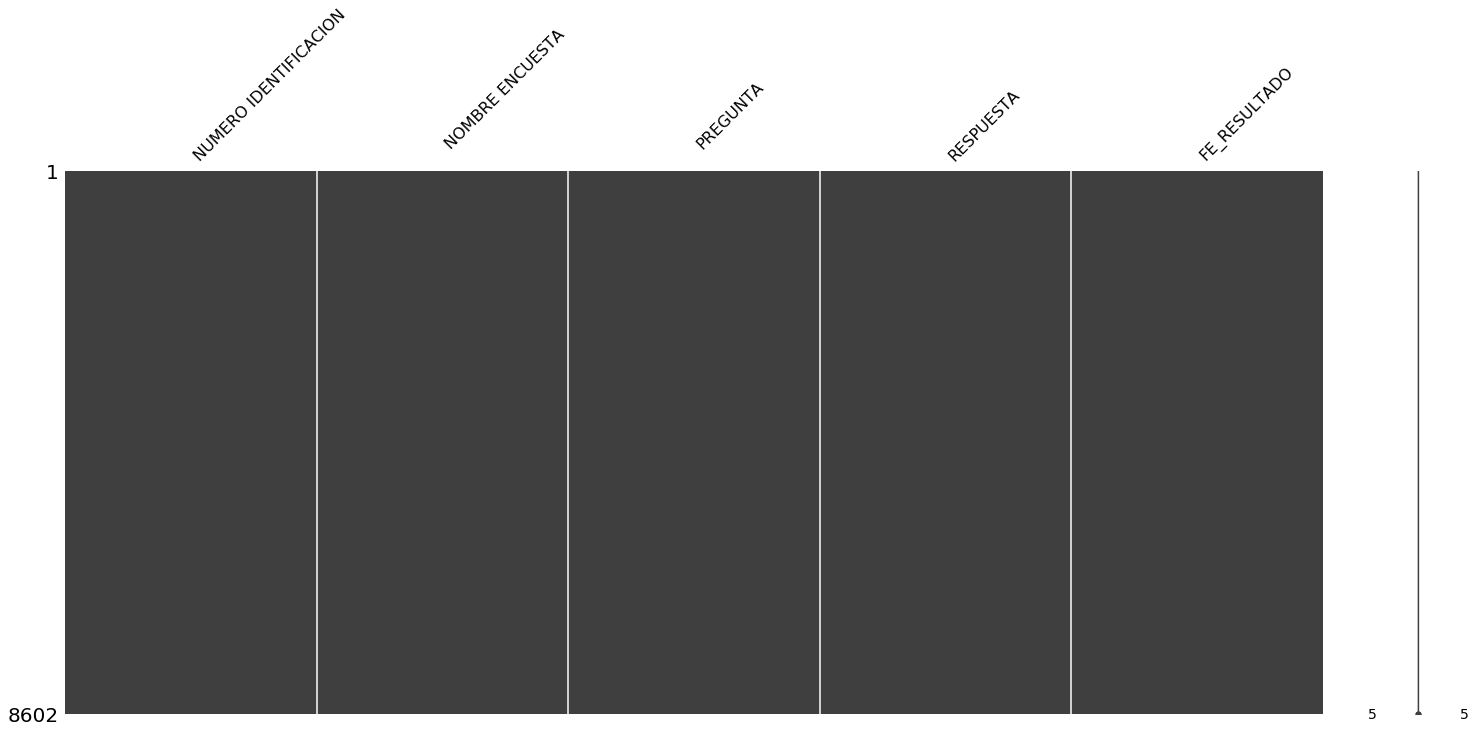

In [27]:
msno.matrix(act_disag)

### Medicines

In [28]:
medicines.head()

,Id,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Numero_Cantidad_Prestaciones
0,940545,2020-02-25,Medellin,M025848,TACROLIMUS MONOHIDRATADO -INDICACIONES DIFEREN...,L309,"DERMATITIS, NO ESPECIFICADA",1.0
1,725649,2020-02-26,Medellin,M029434,MONTELUKAST/LEVOCETIRIZINA DIHIDROCLORURO,J304,"RINITIS ALÉRGICA, NO ESPECIFICADA",28.0
2,535255,2020-02-27,Medellin,M026578,FLUTICASONA PROPIONATO/SALMETEROL,D848,OTRAS INMUNODEFICIENCIAS ESPECIFICADAS,1.0
3,1127795,2020-02-28,Medellin,M004049,DOXICICLINA,N760,VAGINITIS AGUDA,28.0
4,1673566,2020-02-25,Medellin,M280151,BECLOMETASONA NASAL,Z929,HISTORIA PERSONAL DE TRATAMIENTO MÉDICO NO ESP...,1.0


In [29]:
medicines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109596 entries, 0 to 109595
Data columns (total 8 columns):
Id                              109596 non-null int64
Fecha_Emision                   109596 non-null datetime64[ns]
Regional_EPS_Desc               109596 non-null object
Codigo_Prestacion_Op            109596 non-null object
Descripcion_Prestacion          109596 non-null object
Codigo_Diagnostico_EPS_Op       109596 non-null object
Diagnostico_EPS_Desc            109596 non-null object
Numero_Cantidad_Prestaciones    108343 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 6.7+ MB


In [30]:
medicines.describe(include='all')

,Id,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Numero_Cantidad_Prestaciones
count,1.095960e+05,109596,109596,109596,109596,109596,109596,108343.000000
unique,NaN,1188,8,1491,978,1187,1370,NaN
top,NaN,2020-01-24 00:00:00,Medellin,M029140,OMALIZUMAB,J450,ASMA PREDOMINANTEMENTE ALÉRGICA,NaN
freq,NaN,532,95975,8876,14906,22618,21149,NaN
first,NaN,2016-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.645011e+07,NaN,NaN,NaN,NaN,NaN,NaN,26.667814
std,8.874313e+08,NaN,NaN,NaN,NaN,NaN,NaN,42.183389
min,4.175940e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,8.940550e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


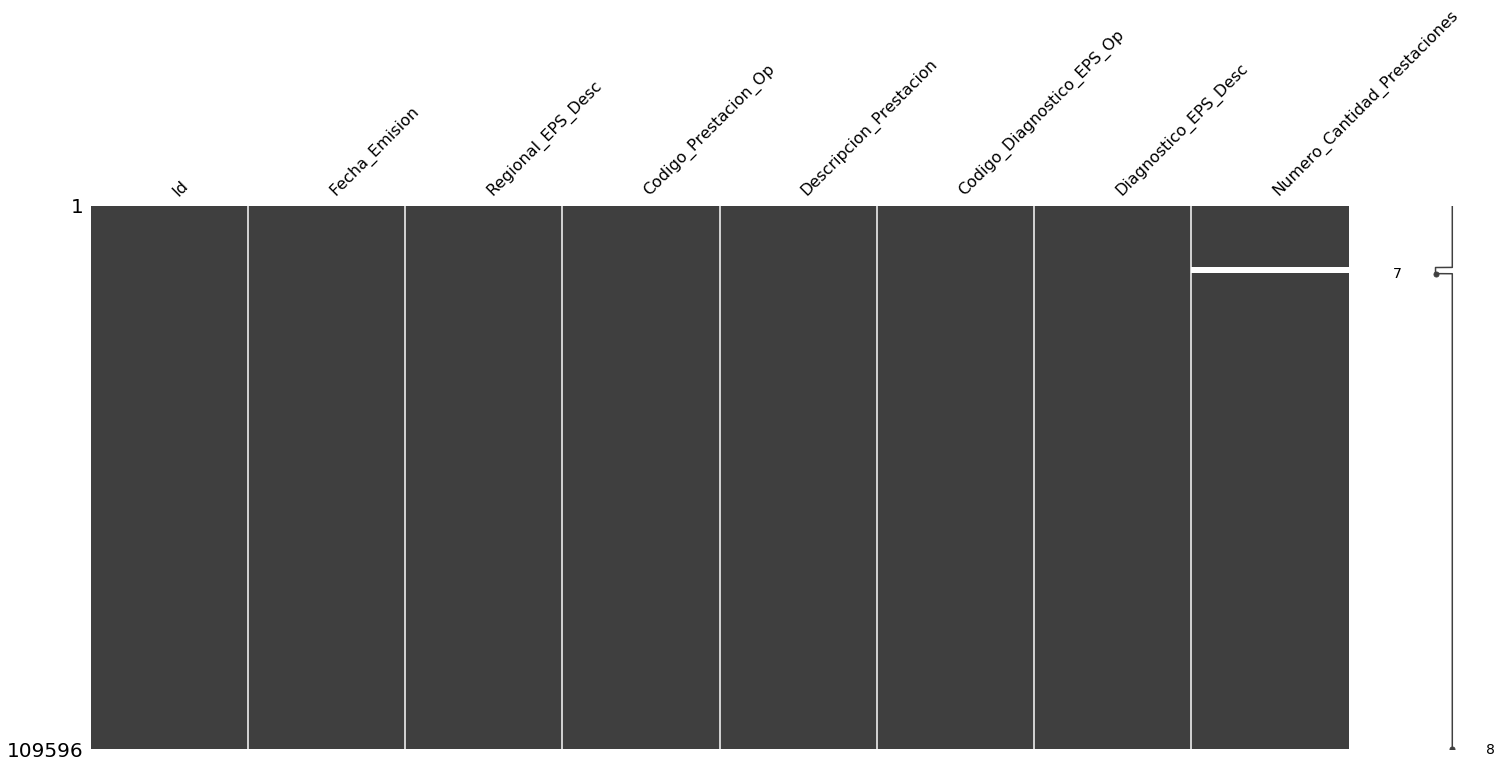

In [31]:
msno.matrix(medicines)

### Diagnostic Aids

In [32]:
diagnostics_aids.head()

,Numero_Identificacion,Fecha_Orden,Manual_Proced_Desc,Result_Ayuda_Diag_Txt
0,417594,2019-08-05,Colesterol Total,145.0
1,423128,2019-11-26,Colesterol Total,235.0
2,423128,2019-05-16,Colesterol Total,199.0
3,423128,2018-06-28,Colesterol Total,256.0
4,423128,2017-12-22,Colesterol Total,226.0


In [33]:
diagnostics_aids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 4 columns):
Numero_Identificacion    6871 non-null int64
Fecha_Orden              6871 non-null datetime64[ns]
Manual_Proced_Desc       6871 non-null object
Result_Ayuda_Diag_Txt    6871 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 214.8+ KB


In [34]:
diagnostics_aids.describe(include='all')

,Numero_Identificacion,Fecha_Orden,Manual_Proced_Desc,Result_Ayuda_Diag_Txt
count,6.871000e+03,6871,6871,6871.000000
unique,NaN,843,25,NaN
top,NaN,2020-01-24 00:00:00,Hemoglobina,NaN
freq,NaN,45,1201,NaN
first,NaN,2016-11-01 00:00:00,NaN,NaN
last,NaN,2020-05-11 00:00:00,NaN,NaN
mean,3.494169e+07,NaN,NaN,286.380731
std,1.201821e+09,NaN,NaN,708.504740
min,4.175940e+05,NaN,NaN,2.300000
25%,9.559730e+05,NaN,NaN,16.500000


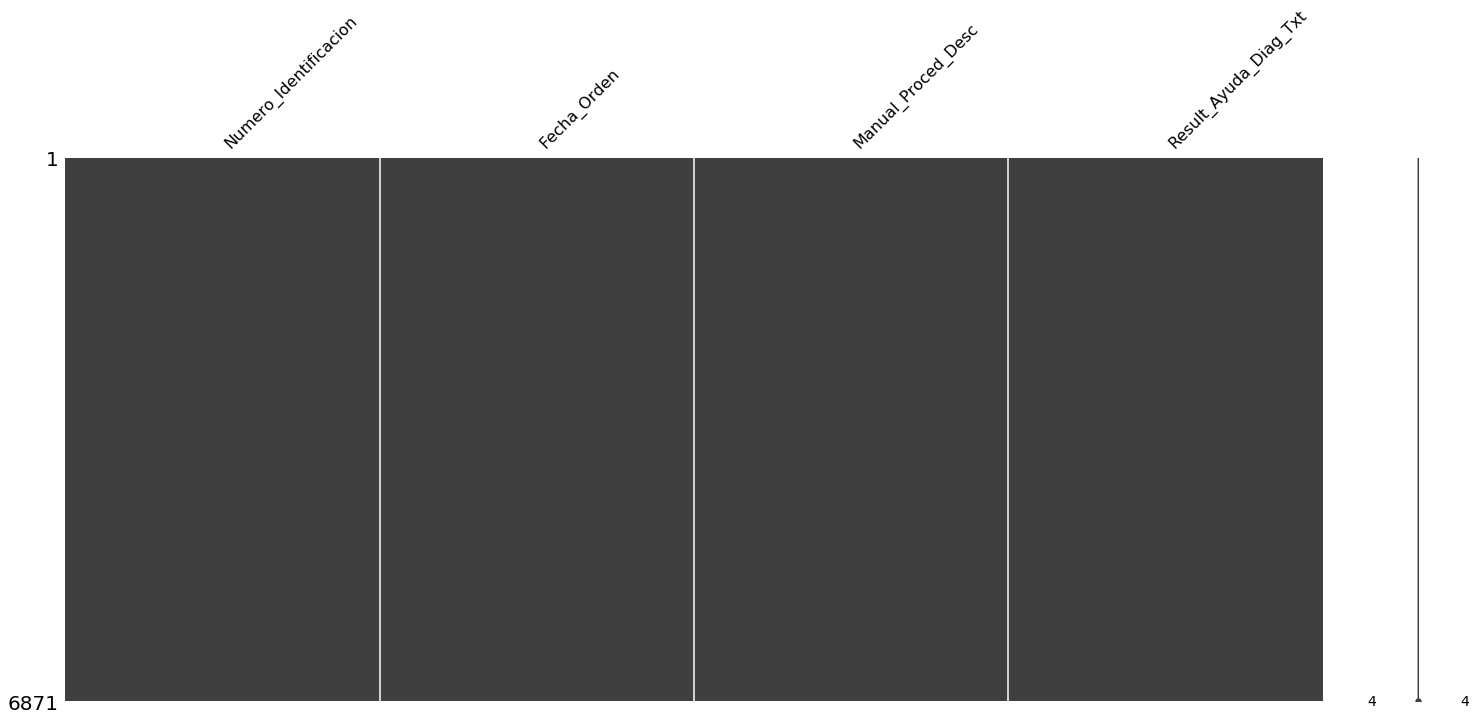

In [35]:
msno.matrix(diagnostics_aids)

### Issues when collecting the medicines

In [36]:
collecting_issues.head()

,IDENTIFICACIÓN,TIPO NOVEDAD,TIPO EVENTO,NOVEDAD,FE_REGISTRO,OBSERVACIONES
0,1729172,INCONSISTENCIAS EN LA RECLAMACION,AUTORIZAN MX PARA OTRO PROVEEDOR,NaN,2012-07-03,"OMALIZUMAB XOLAIR, LAS 3 PRIMERAS APLICACIONES..."
1,852244,INCONSISTENCIAS EN LA RECLAMACION,INCONVENIENTES CON LA AUTORIZACION DEL MEDICAM...,NaN,2012-04-02,NaN
2,1001619,INCONSISTENCIAS EN LA RECLAMACION,INCONVENIENTES PERSONALES PARA RECLAMARLO,NaN,2012-07-06,OMALIZUMAB- PACIENTE QUE RELATA QUE NO PUDO AS...
3,852244,INCONSISTENCIAS EN LA RECLAMACION,DESCONOCIMIENTO DE TRAMITES,NaN,2012-11-15,salmeterol/fluticasona y montelukast\r\n
4,811451,INCONSISTENCIAS EN LA RECLAMACION,PACIENTE NO CONTACTADO,NaN,2012-12-11,se habla con la hija andrea quien brinda el nu...


In [37]:
collecting_issues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7684 entries, 0 to 7683
Data columns (total 6 columns):
IDENTIFICACIÓN    7684 non-null int64
TIPO NOVEDAD      7684 non-null object
TIPO EVENTO       7684 non-null object
NOVEDAD           0 non-null float64
FE_REGISTRO       7684 non-null object
OBSERVACIONES     6967 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 360.3+ KB


In [38]:
collecting_issues.describe(include='all')

,IDENTIFICACIÓN,TIPO NOVEDAD,TIPO EVENTO,NOVEDAD,FE_REGISTRO,OBSERVACIONES
count,7.684000e+03,7684,7684,0.0,7684,6967
unique,NaN,2,50,NaN,1201,5827
top,NaN,NUEVO INCONSISTENTE,CONFIRMACION DE CITA,NaN,2018-03-19,21755 OMALIZUMAB 150 MG - SE REALIZA COMUNICAC...
freq,NaN,3844,2208,NaN,144,41
mean,1.255536e+06,NaN,NaN,NaN,NaN,NaN
std,4.313943e+05,NaN,NaN,NaN,NaN,NaN
min,5.005470e+05,NaN,NaN,NaN,NaN,NaN
25%,8.901600e+05,NaN,NaN,NaN,NaN,NaN
50%,1.240215e+06,NaN,NaN,NaN,NaN,NaN
75%,1.629016e+06,NaN,NaN,NaN,NaN,NaN


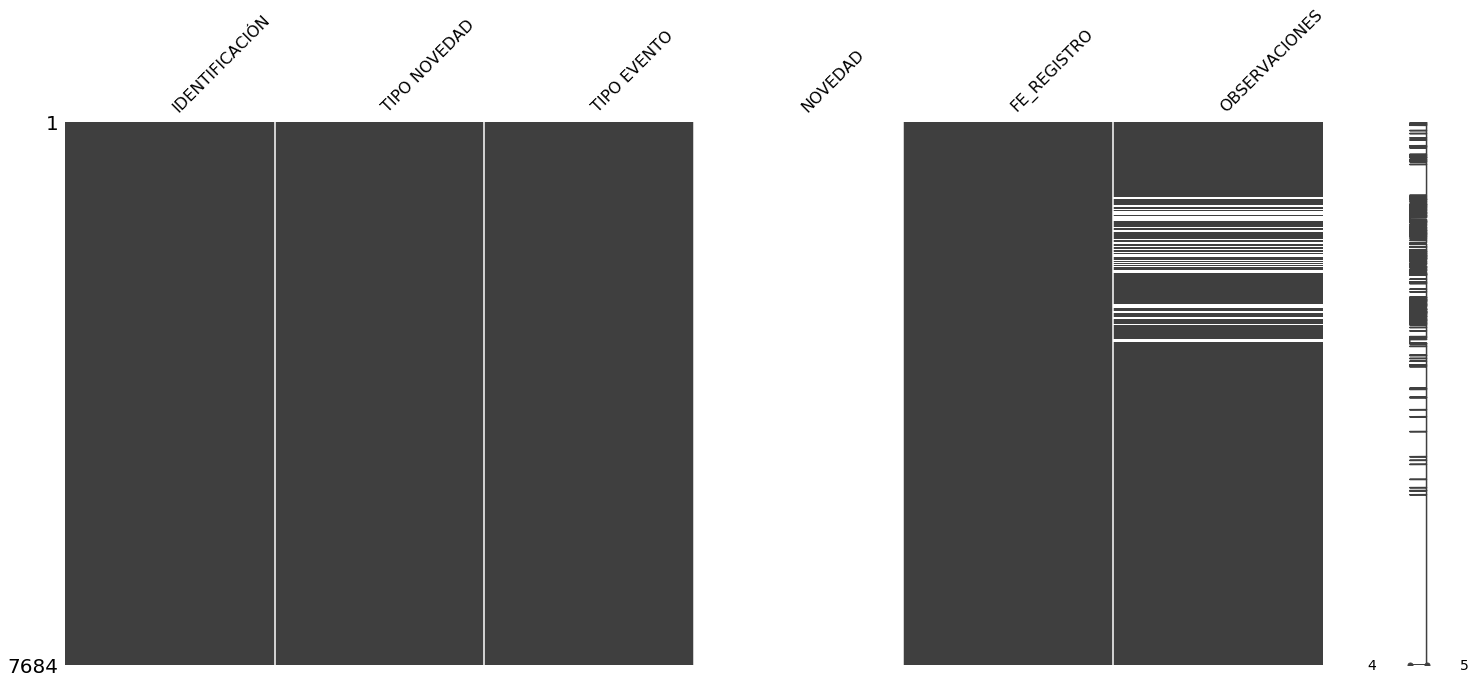

In [39]:
msno.matrix(collecting_issues)

### Hospitalizations

In [40]:
hospitalizations.head()

,Id,Sexo,EDAD (Años),Id Diagnostico Egreso,Descripción diagnostico (egreso),Dias Uci,Dias Uce,Días de Estancia (Calculada),Fecha Ingreso,Fecha Egreso
0,1381384,Femenino,43,R060,DISNEA,0,0,0,43973,43973
1,1118363,Masculino,6,R060,DISNEA,0,0,0,43832,43832
2,1118363,Masculino,6,R060,DISNEA,0,0,0,43832,43832
3,978163,Masculino,12,E848,FIBROSIS QUÍSTICA CON OTRAS MANIFESTACIONES,0,0,0,43608,43608
4,1140753,Masculino,31,J459,"ASMA, NO ESPECIFICADA",0,0,0,43334,43334


In [41]:
hospitalizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 10 columns):
Id                                  1750 non-null int64
Sexo                                1750 non-null object
EDAD (Años)                         1750 non-null int64
Id Diagnostico Egreso               1705 non-null object
Descripción diagnostico (egreso)    1750 non-null object
Dias Uci                            1750 non-null int64
Dias Uce                            1750 non-null int64
Días de Estancia (Calculada)        1750 non-null int64
Fecha Ingreso                       1750 non-null int64
Fecha Egreso                        1750 non-null int64
dtypes: int64(7), object(3)
memory usage: 136.8+ KB


In [42]:
hospitalizations.describe(include='all')

,Id,Sexo,EDAD (Años),Id Diagnostico Egreso,Descripción diagnostico (egreso),Dias Uci,Dias Uce,Días de Estancia (Calculada),Fecha Ingreso,Fecha Egreso
count,1.750000e+03,1750,1750.000000,1705,1750,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
unique,NaN,2,NaN,316,327,NaN,NaN,NaN,NaN,NaN
top,NaN,Femenino,NaN,J459,"ASMA, NO ESPECIFICADA",NaN,NaN,NaN,NaN,NaN
freq,NaN,1298,NaN,334,345,NaN,NaN,NaN,NaN,NaN
mean,1.173169e+06,NaN,47.198286,NaN,NaN,0.244000,0.275429,6.015429,42297.897714,42303.907429
std,4.374713e+05,NaN,150.419418,NaN,NaN,1.498773,1.144066,6.735830,1201.760581,1202.198782
min,5.005470e+05,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,39449.000000,39455.000000
25%,7.765018e+05,NaN,20.000000,NaN,NaN,0.000000,0.000000,3.000000,41368.000000,41374.250000
50%,1.131168e+06,NaN,40.000000,NaN,NaN,0.000000,0.000000,4.000000,42675.500000,42681.000000
75%,1.520808e+06,NaN,57.000000,NaN,NaN,0.000000,0.000000,7.000000,43285.000000,43291.750000


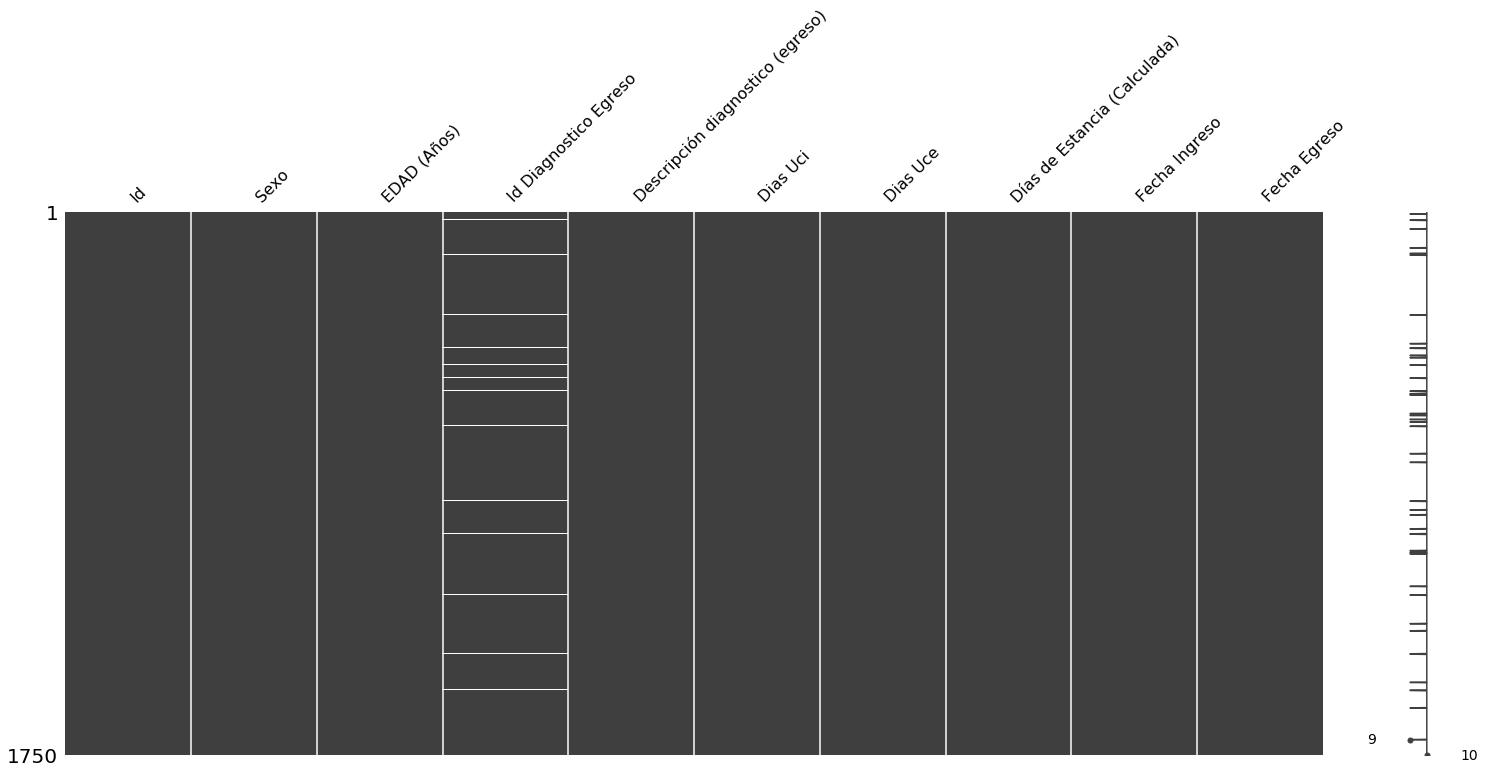

In [43]:
msno.matrix(hospitalizations)

### Antecedentes patológicos

In [44]:
pathological_records.head()

,DS_IDENTIFICACION,EPS,FE_ACTUALIZA,FE_INICIO,FE_FIN,DS_OBSERVACIONES,Diagnostico,CodDiagnostico
0,653834,EPS/SURA,2010-10-10,2010-10-09,NaT,NaN,TRASPLANTE DE CORAZON,Z941
1,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,OTRAS DERMATITIS ATOPICAS,L208
2,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,"RINITIS ALERGICA, NO ESPECIFICADA",J304
3,653834,EPS/SURA,2017-08-01,2011-03-02,NaT,NaN,ASMA PREDOMINANTEMENTE ALERGICA,J450
4,653834,EPS/SURA,2012-10-17,2012-10-17,NaT,NaN,CHOQUE ANAFILACTICO DEBIDO A REACCION ADVERSA ...,T780


In [45]:
pathological_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 8 columns):
DS_IDENTIFICACION    2086 non-null int64
EPS                  2086 non-null object
FE_ACTUALIZA         2086 non-null datetime64[ns]
FE_INICIO            2034 non-null datetime64[ns]
FE_FIN               148 non-null datetime64[ns]
DS_OBSERVACIONES     58 non-null object
Diagnostico          2085 non-null object
CodDiagnostico       2085 non-null object
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 130.5+ KB


In [46]:
pathological_records.describe(include='all')

,DS_IDENTIFICACION,EPS,FE_ACTUALIZA,FE_INICIO,FE_FIN,DS_OBSERVACIONES,Diagnostico,CodDiagnostico
count,2.086000e+03,2086,2086,2034,148,58,2085,2085
unique,NaN,5,855,1431,129,52,336,336
top,NaN,EPS/SURA,2012-01-23 00:00:00,2012-01-01 00:00:00,2011-09-13 00:00:00,PACIENTE NO PRESENTA NINGUN TRASTORNO PSICOLOG...,ASMA PREDOMINANTEMENTE ALERGICA,J450
freq,NaN,2011,36,11,6,4,387,387
first,NaN,NaN,2010-10-10 00:00:00,1950-01-01 00:00:00,1982-11-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2020-05-01 00:00:00,2020-04-28 00:00:00,2019-10-22 00:00:00,NaN,NaN,NaN
mean,1.233511e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.388575e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.005470e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.327988e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


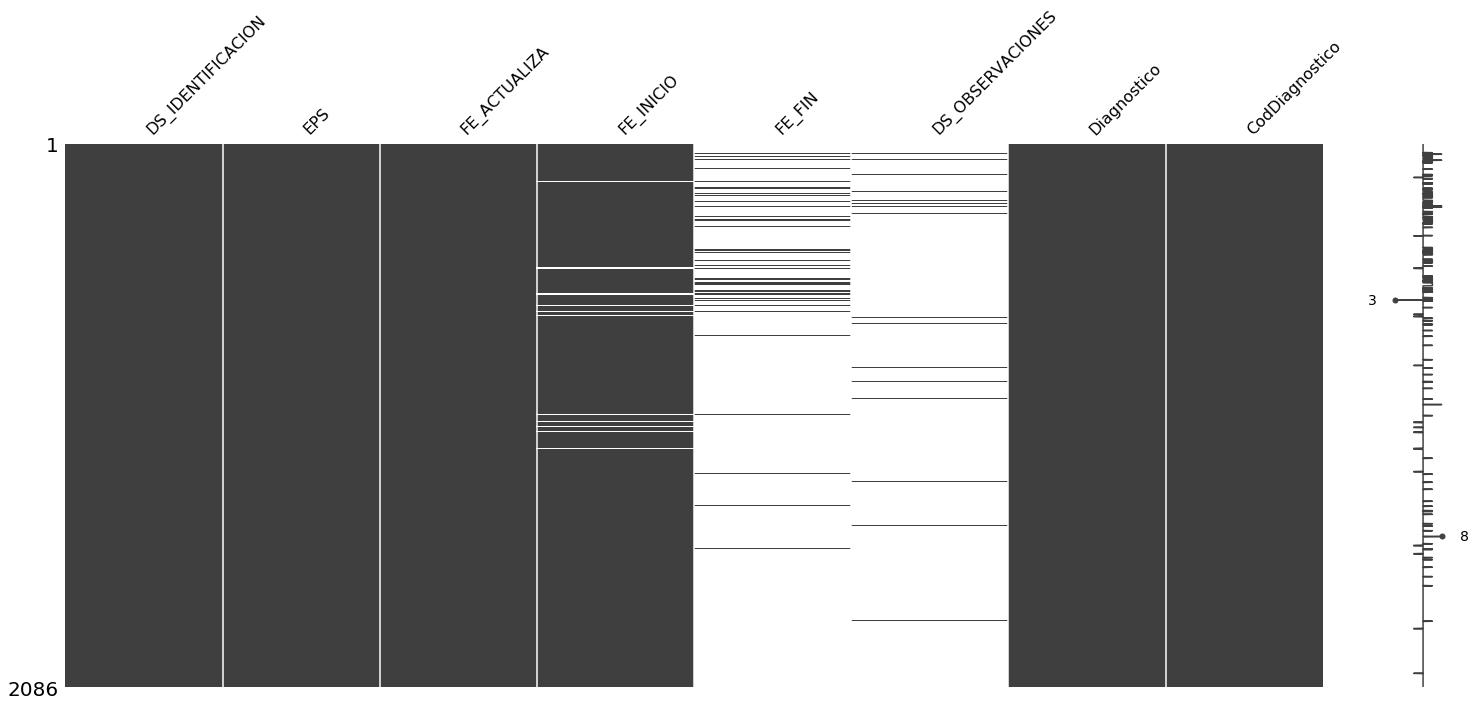

In [47]:
msno.matrix(pathological_records)

### Emergencies

In [48]:
emergencies.head()

,Numero_Identificacion,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada
0,1759148,2019-09-29,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
1,1110797,2019-07-20,Armenia,S0050115,ATENCION MEDICA PRIORITARIA,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS,1
2,1497880,2019-07-21,Armenia,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
3,1598583,2019-06-18,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4,525540,2019-06-11,Pereira,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1


In [49]:
emergencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5086 entries, 0 to 5085
Data columns (total 8 columns):
Numero_Identificacion        5086 non-null int64
Fecha_Emision                5086 non-null datetime64[ns]
Regional_EPS_Desc            5086 non-null object
Codigo_Prestacion_Op         5086 non-null object
Descripcion_Prestacion       5086 non-null object
Codigo_Diagnostico_EPS_Op    5086 non-null object
Diagnostico_EPS_Desc         5086 non-null object
Cantidad_Autorizada          5086 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 318.0+ KB


In [50]:
emergencies.describe(include='all')

,Numero_Identificacion,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada
count,5.086000e+03,5086,5086,5086,5086,5086,5086,5086.0
unique,NaN,938,8,2,2,341,358,6.0
top,NaN,2019-07-16 00:00:00,Medellin,S0050115,ATENCION MEDICA PRIORITARIA,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1.0
freq,NaN,38,4250,3146,3146,1512,1480,5054.0
first,NaN,2016-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.200322e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.182196e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.005470e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.505090e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


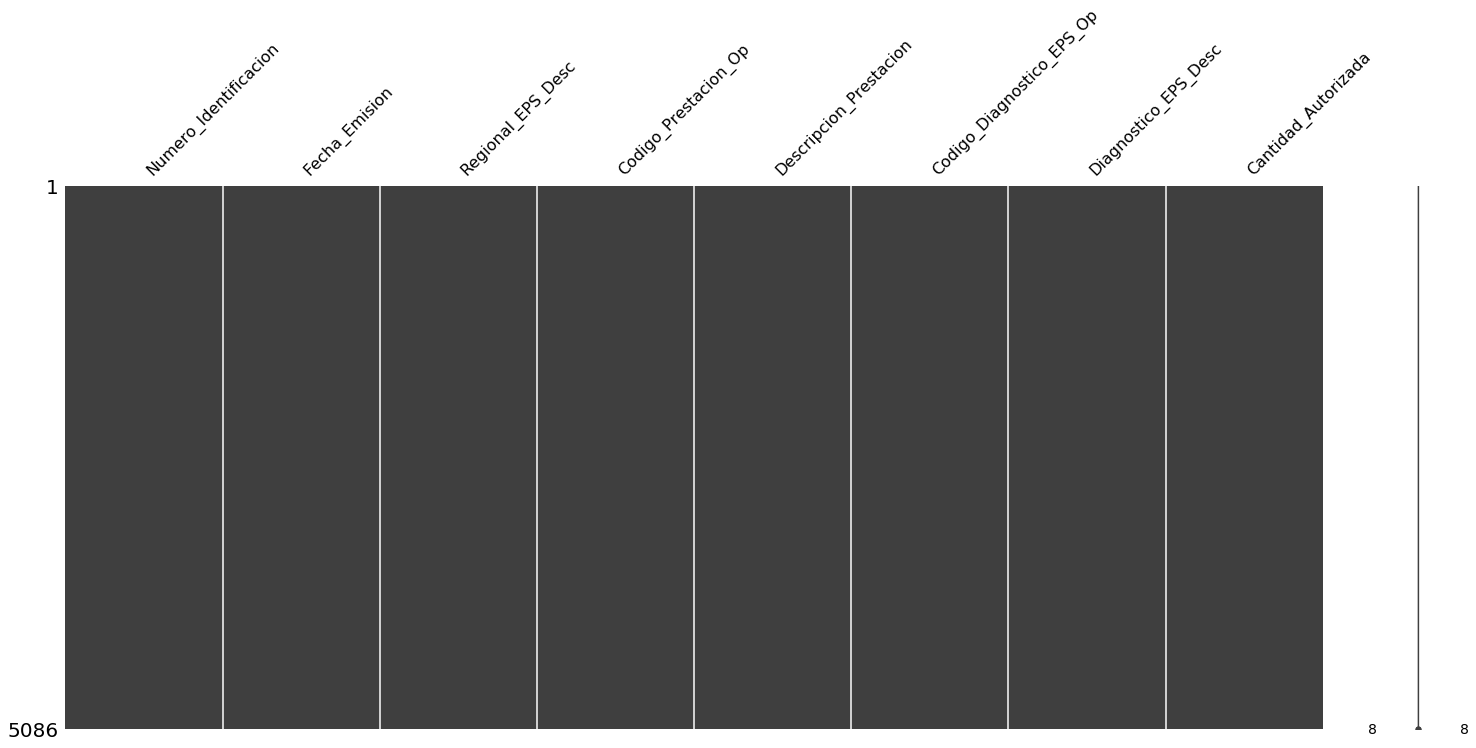

In [51]:
msno.matrix(emergencies)

### Pharmacovigilance

In [52]:
ram_pharmacovigilance.head()

,FECHA_NOTIFICACION,DEPARTAMENTO,MUNICIPIO,EPS,ETNIA,FECHA_NACIMIENTO,EDAD,TIPO_IDENTIFICACION,NRO_IDENTIFICACION,SEXO,...,EVOLUCION,SERIEDAD,EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO,EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO,EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED,PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC,CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO,EVITABILIDAD,GRAVEDAD,DS_PLAN_INTERVENCION
0,2013-08-05,ANTIOQUIA,GIRARDOTA,EPS/SURA,MESTIZO,1977-09-06,42,CC,1706844,F,...,RECUPERADO SIN SECUELAS,OTROS,SI,SI,NO SABE,NO SABE,POSIBLE,NaN,LEVE,SE LE INDICA A LA PACIENTE USAR SUS MEDICAMENT...
1,2013-03-05,ANTIOQUIA,ITAGUI,EPS/SURA,MESTIZO,1972-09-09,47,CC,1452148,F,...,RECUPERADO SIN SECUELAS,DESCONOCIDO,SI,SI,NO,SI,POSIBLE,NO,MODERADA,SE EXPLICA IMPORTANCIA A LA PACIENTE DE NUNCA ...
2,2013-03-06,ANTIOQUIA,MEDELLIN,EPS/SURA,MESTIZO,1966-10-02,53,CC,730790,F,...,RECUPERADO SIN SECUELAS,OTROS,SI,SI,NO SABE,NO,POSIBLE,NO,MODERADA,SE COMUNICARA CASO AL MEDICO TRATANTE
3,2013-03-06,ANTIOQUIA,RIONEGRO,EPS/SURA,MESTIZO,1982-12-24,37,CC,738900,F,...,RECUPERADO SIN SECUELAS,OTROS,SI,SI,NO SABE,SI,POSIBLE,NO,MODERADA,CONTINUAR EN SFT
4,2013-08-15,ANTIOQUIA,BELLO,EPS/SURA,MESTIZO,1974-08-21,45,CC,1479905,M,...,RECUPERADO SIN SECUELAS,OTROS,NaN,NaN,NO SABE,NO SABE,POSIBLE,NO,LEVE,PACIENTE QUE ENTIENDE RIESGO BENEFICIO DE LA A...


In [53]:
ram_pharmacovigilance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 32 columns):
FECHA_NOTIFICACION                                 309 non-null datetime64[ns]
DEPARTAMENTO                                       309 non-null object
MUNICIPIO                                          309 non-null object
EPS                                                309 non-null object
ETNIA                                              309 non-null object
FECHA_NACIMIENTO                                   309 non-null datetime64[ns]
EDAD                                               309 non-null int64
TIPO_IDENTIFICACION                                309 non-null object
NRO_IDENTIFICACION                                 309 non-null int64
SEXO                                               309 non-null object
PESO                                               309 non-null float64
ESTATURA                                           309 non-null int64
DIAGNOSTICO_PPAL_CONDICIONES_

In [54]:
ram_pharmacovigilance.describe(include='all')

,FECHA_NOTIFICACION,DEPARTAMENTO,MUNICIPIO,EPS,ETNIA,FECHA_NACIMIENTO,EDAD,TIPO_IDENTIFICACION,NRO_IDENTIFICACION,SEXO,...,EVOLUCION,SERIEDAD,EVENTO_PRESENTO_DESPUES_ADMINISTRAR_MEDICAMENTO,EXISTEN_OTROS_FACTORES_PUEDAN_EXPLICAR_EVENTO,EVENTO_DESAPARECIO_DISMINUIR_SUSP_MED,PACIENTE_HABIA_PRESENTADO_MISMA_REACION_MEDIC,CAUSALIDAD_SEGUN_ALGORITMO_DE_NARANJO,EVITABILIDAD,GRAVEDAD,DS_PLAN_INTERVENCION
count,309,309,309,309,309,309,309.000000,309,3.090000e+02,309,...,308,304,299,299,308,308,308,307,308,309
unique,149,6,25,3,3,217,NaN,3,NaN,2,...,3,4,3,3,3,3,4,1,3,226
top,2020-04-22 00:00:00,ANTIOQUIA,MEDELLIN,EPS/SURA,MESTIZO,1991-12-13 00:00:00,NaN,CC,NaN,F,...,RECUPERADO SIN SECUELAS,DESCONOCIDO,SI,SI,NO SABE,SI,POSIBLE,NO,LEVE,SE EXPLICA PROBABILIDAD DE REACCIÓN ASOCIADA A...
freq,24,276,182,304,298,5,NaN,267,NaN,237,...,173,283,293,293,195,168,195,307,248,30
first,2013-03-05 00:00:00,NaN,NaN,NaN,NaN,1938-08-20 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-05-06 00:00:00,NaN,NaN,NaN,NaN,2013-10-28 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,37.498382,NaN,1.252824e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,16.363093,NaN,4.187689e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,5.255400e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,9.042490e+05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


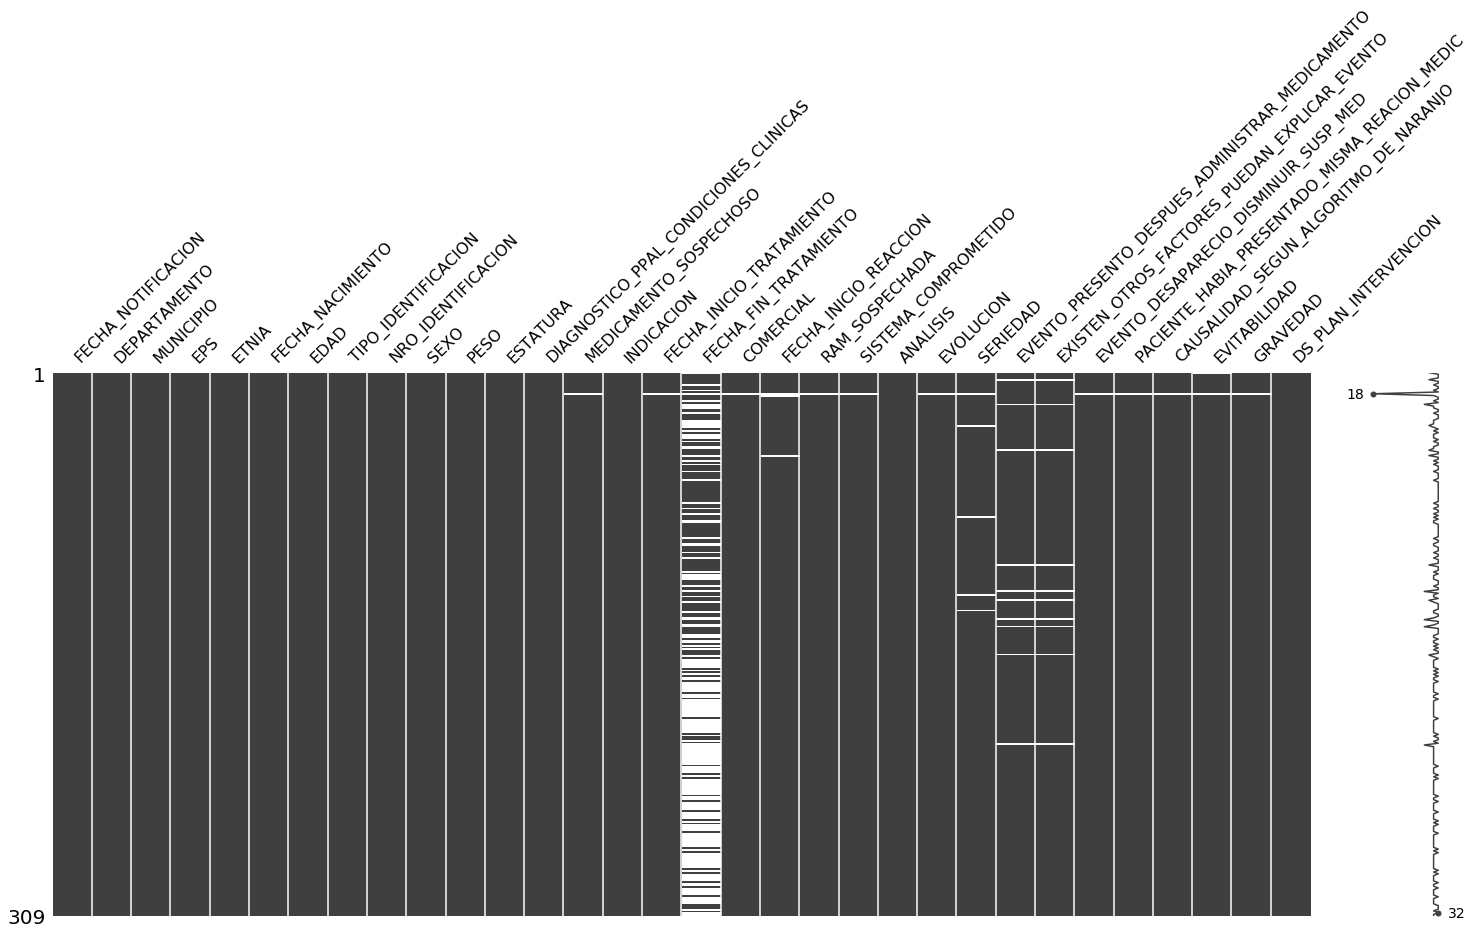

In [55]:
msno.matrix(ram_pharmacovigilance)

### Dyspnea scale

In [56]:
dyspnea.head()

,id,FE_ALTA,Examen
0,1998401,2016-06-02,ESCALA DE DISNEA mMRC EPOC 0
1,1491934,2016-06-10,ESCALA DE DISNEA mMRC EPOC 0
2,801004,2019-07-12,ESCALA DE DISNEA mMRC EPOC 0
3,1226479,2019-07-26,ESCALA DE DISNEA mMRC EPOC 0
4,1241688,2016-09-01,ESCALA DE DISNEA mMRC EPOC 0


In [57]:
dyspnea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
id         137 non-null int64
FE_ALTA    137 non-null datetime64[ns]
Examen     137 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.3+ KB


In [58]:
dyspnea.describe(include='all')

,id,FE_ALTA,Examen
count,1.370000e+02,137,137
unique,NaN,106,5
top,NaN,2016-03-23 00:00:00,ESCALA DE DISNEA mMRC EPOC 2
freq,NaN,7,52
first,NaN,2015-06-13 00:00:00,NaN
last,NaN,2019-07-26 00:00:00,NaN
mean,1.215384e+06,NaN,NaN
std,3.770220e+05,NaN,NaN
min,5.240060e+05,NaN,NaN
25%,9.165100e+05,NaN,NaN


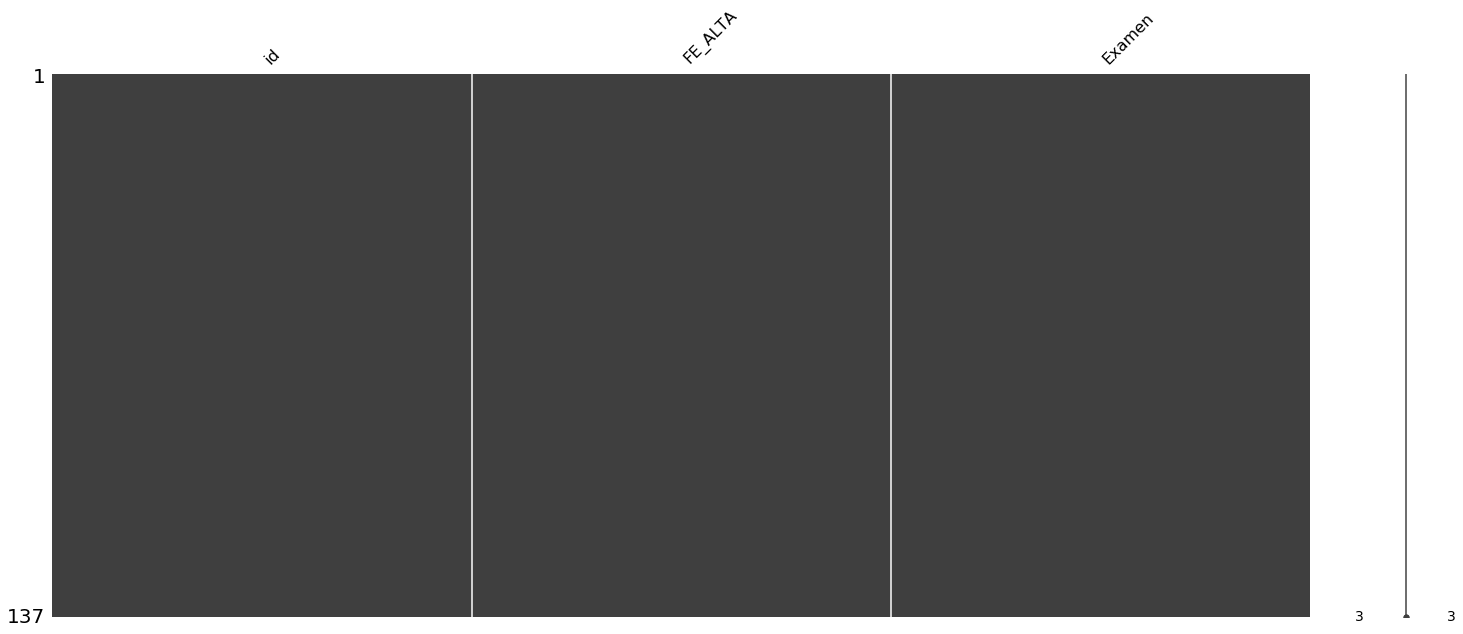

In [59]:
msno.matrix(dyspnea)

### Habits

In [60]:
habits.head()

,DS_IDENTIFICACION,Tipo,Habito2,Habito3,FE_INICIO,FE_FIN,DS_OBSERVACION,Fe_Registro
0,547351,ALCOHOL,BEBEDOR MODERADO,NaN,NaT,NaT,DIA POR MEDIO,2012-06-29
1,1123102,ALCOHOL,ABSTEMIO,NaN,NaT,NaT,NaN,2010-12-02
2,788432,ALCOHOL,ABSTEMIO,NaN,NaT,NaT,NaN,2014-02-20
3,885255,ALCOHOL,ABSTEMIO,NaN,NaT,NaT,NaN,2016-02-02
4,1261121,ALCOHOL,BEBEDOR MODERADO,NaN,NaT,NaT,NaN,2019-07-09


In [61]:
habits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931 entries, 0 to 1930
Data columns (total 8 columns):
DS_IDENTIFICACION    1931 non-null int64
Tipo                 1931 non-null object
Habito2              1930 non-null object
Habito3              123 non-null object
FE_INICIO            116 non-null datetime64[ns]
FE_FIN               28 non-null datetime64[ns]
DS_OBSERVACION       95 non-null object
Fe_Registro          1931 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 120.8+ KB


In [62]:
habits.describe(include='all')

,DS_IDENTIFICACION,Tipo,Habito2,Habito3,FE_INICIO,FE_FIN,DS_OBSERVACION,Fe_Registro
count,1.931000e+03,1931,1930,123,116,28,95,1931
unique,NaN,9,35,11,52,24,89,378
top,NaN,METODO DE PLANIFICACION,NO,1 a 3 tazas/dia,2020-03-19 00:00:00,2012-10-04 00:00:00,3 tazas dia,2017-09-13 00:00:00
freq,NaN,443,475,36,15,4,2,162
first,NaN,NaN,NaN,NaN,1960-05-02 00:00:00,1982-11-02 00:00:00,NaN,2010-11-25 00:00:00
last,NaN,NaN,NaN,NaN,2020-03-20 00:00:00,2016-08-30 00:00:00,NaN,2020-03-27 00:00:00
mean,1.257558e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.227500e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.005880e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.039405e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


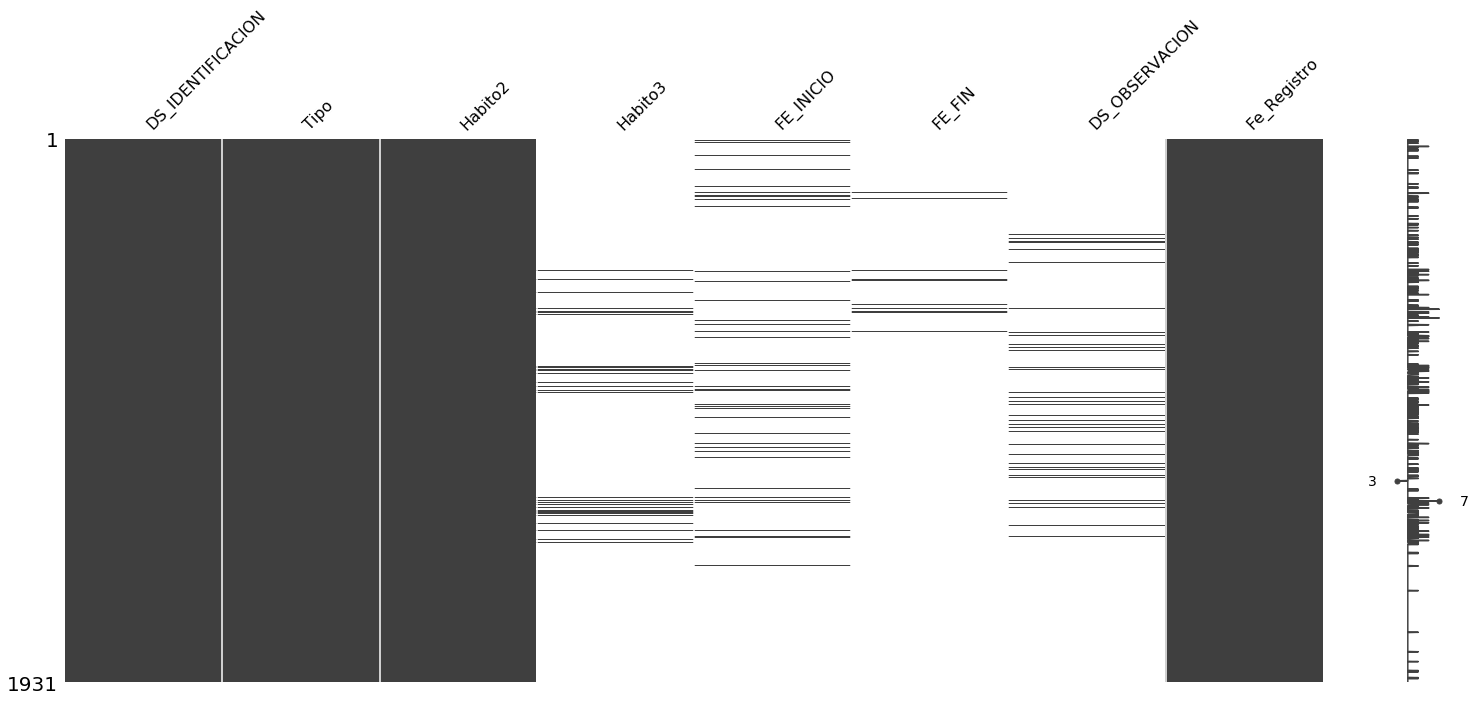

In [63]:
msno.matrix(habits)

### Familiar records

In [64]:
familiar_records.head()

,Id,EPS,FE_ALTA,FE_INICIO,FE_FIN,Diagnostico,CodDiagnostico,Parentesco
0,1998401,EPS/SURA,2012-07-09,2006-01-01,NaT,"ASMA, NO ESPECIFICADA",J459,MADRE
1,535255,EPS/SURA,2011-07-29,NaT,2011-07-29,"DIABETES MELLITUS, NO ESPECIFICADA SIN MENCION...",E149,ABUELO
2,1004538,EPS/SURA,2012-01-17,2009-06-10,NaT,HIPERTENSION ESENCIAL (PRIMARIA),I10X,PADRE
3,788432,EPS/SURA,2012-01-06,2007-09-27,NaT,HIPERTENSION ESENCIAL (PRIMARIA),I10X,PADRE
4,788432,EPS/SURA,2012-01-06,2007-09-27,NaT,HIPERTENSION ESENCIAL (PRIMARIA),I10X,MADRE


In [65]:
familiar_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
Id                104 non-null int64
EPS               104 non-null object
FE_ALTA           104 non-null datetime64[ns]
FE_INICIO         49 non-null datetime64[ns]
FE_FIN            27 non-null datetime64[ns]
Diagnostico       104 non-null object
CodDiagnostico    104 non-null object
Parentesco        104 non-null object
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 6.6+ KB


In [66]:
familiar_records.describe(include='all')

,Id,EPS,FE_ALTA,FE_INICIO,FE_FIN,Diagnostico,CodDiagnostico,Parentesco
count,1.040000e+02,104,104,49,27,104,104,104
unique,NaN,2,50,34,13,32,32,6
top,NaN,EPS/SURA,2011-09-13 00:00:00,2009-06-11 00:00:00,2011-09-13 00:00:00,HIPERTENSION ESENCIAL (PRIMARIA),I10X,MADRE
freq,NaN,99,6,4,6,30,30,35
first,NaN,NaN,2010-12-01 00:00:00,1950-01-01 00:00:00,2010-12-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2019-06-19 00:00:00,2019-03-15 00:00:00,2011-10-11 00:00:00,NaN,NaN,NaN
mean,1.299300e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.405538e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.294100e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.967585e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


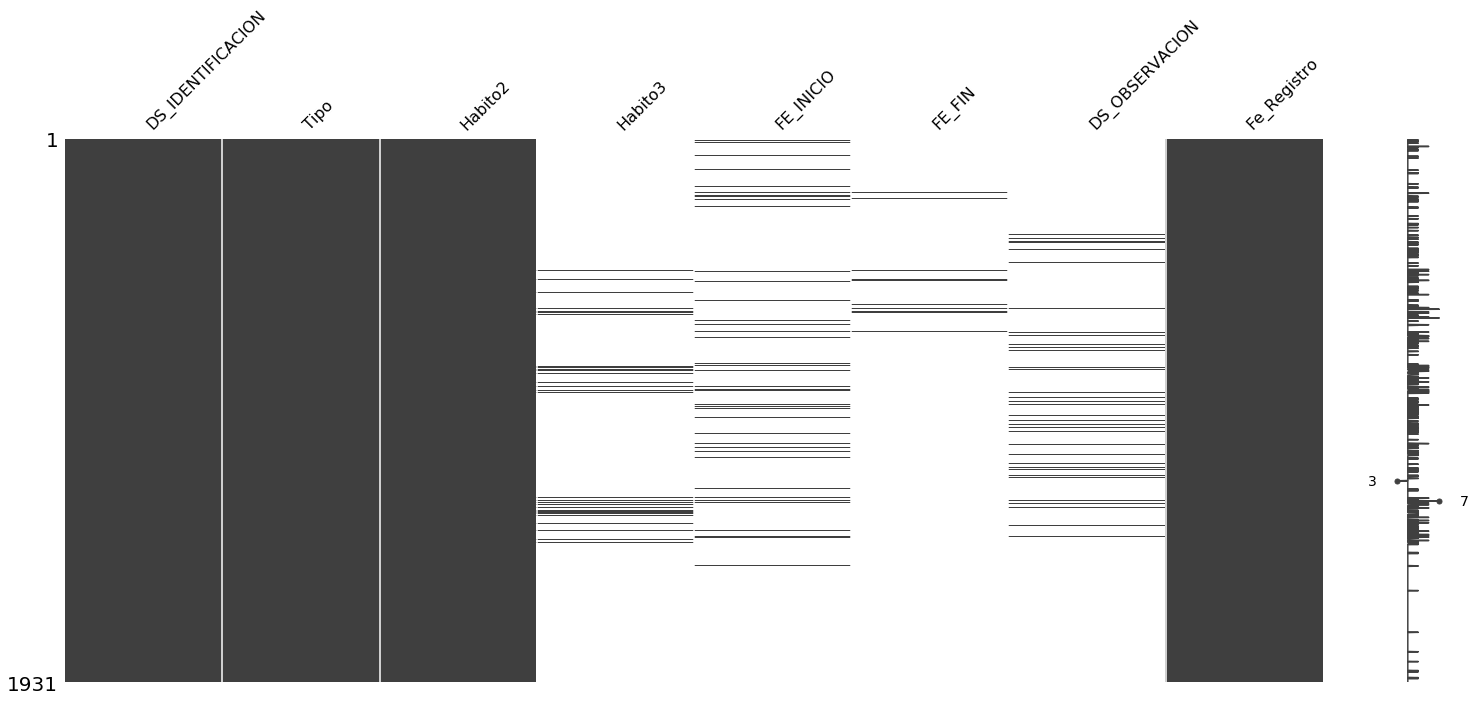

In [63]:
msno.matrix(familiar_records)

### Biologics asthma

In [68]:
biologics_asthma.head()

,Identificacion,Fecha_Dcto,Nombre_Producto_Mvto,Nom_Generico,Cantidad
0,1853167,2019-08-02,OMALIZUMAB 150 MG POLV INY (XOLAIR)-21755-4896,OMALIZUMAB,2
1,695889,2019-07-31,OMALIZUMAB 150 MG POLV INY (XOLAIR)-21755-4896,OMALIZUMAB,2
2,1534187,2019-01-05,OMALIZUMAB SOLUCIÓN INYECTABLE 150MG /1ML (XOL...,OMALIZUMAB,4
3,1831103,2018-12-03,OMALIZUMAB SOLUCIÓN INYECTABLE 150MG /1ML (XOL...,OMALIZUMAB,3
4,1831103,2019-01-03,OMALIZUMAB SOLUCIÓN INYECTABLE 150MG /1ML (XOL...,OMALIZUMAB,3


In [69]:
biologics_asthma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12594 entries, 0 to 12593
Data columns (total 5 columns):
Identificacion          12594 non-null int64
Fecha_Dcto              12594 non-null datetime64[ns]
Nombre_Producto_Mvto    12594 non-null object
Nom_Generico            12594 non-null object
Cantidad                12594 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 492.0+ KB


In [70]:
biologics_asthma.describe(include='all')

,Identificacion,Fecha_Dcto,Nombre_Producto_Mvto,Nom_Generico,Cantidad
count,1.259400e+04,12594,12594,12594,12594.000000
unique,NaN,743,7,4,NaN
top,NaN,2019-03-03 00:00:00,OMALIZUMAB SOLUCIÓN INYECTABLE 150MG /1ML (XOL...,OMALIZUMAB,NaN
freq,NaN,78,9005,11700,NaN
first,NaN,2016-11-08 00:00:00,NaN,NaN,NaN
last,NaN,2020-05-30 00:00:00,NaN,NaN,NaN
mean,1.259062e+06,NaN,NaN,NaN,2.075036
std,4.346452e+05,NaN,NaN,NaN,1.329174
min,5.005470e+05,NaN,NaN,NaN,-8.000000
25%,8.876732e+05,NaN,NaN,NaN,1.000000


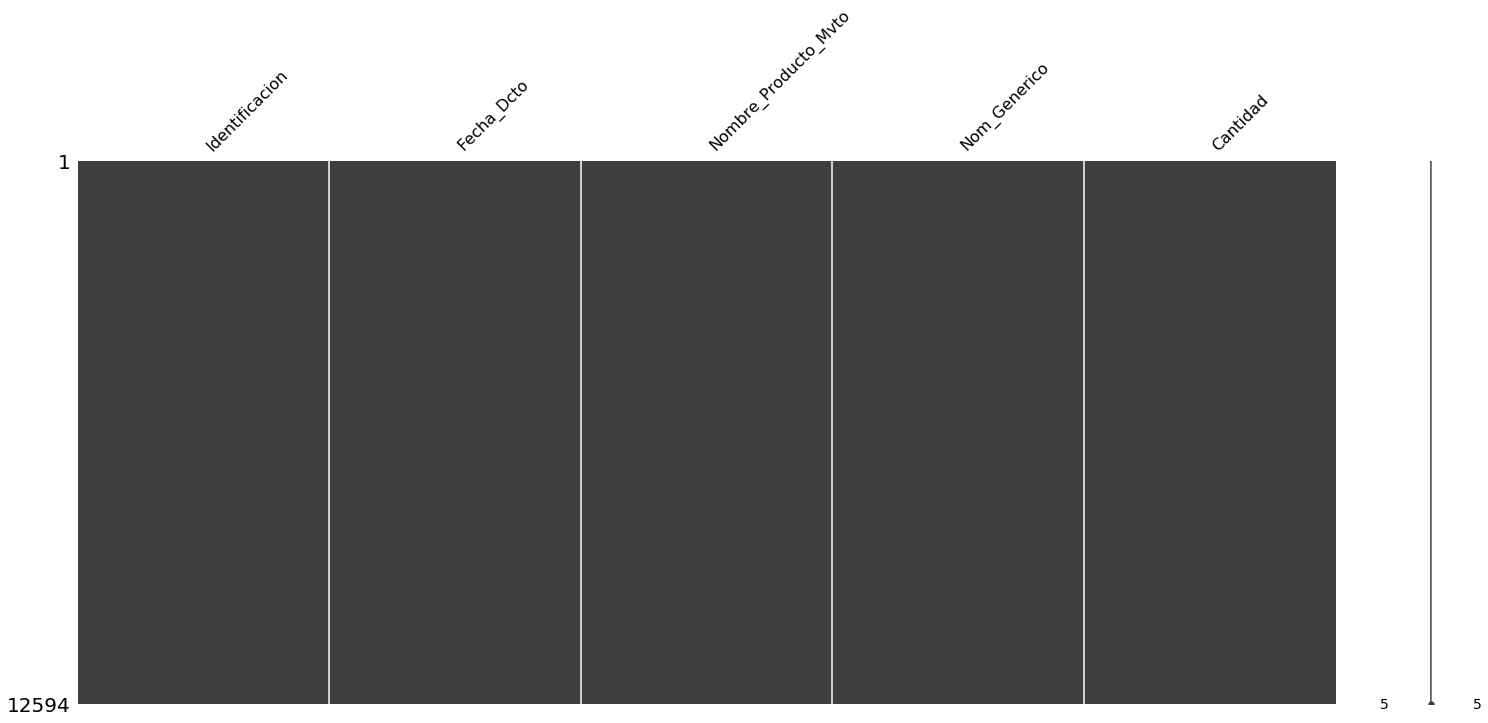

In [71]:
msno.matrix(biologics_asthma)

### Height Weight

In [72]:
height_weight.head()

,DS_IDENTIFICACION,FE_alta,NM_IMC,NM_PESO,NM_TALLA,Clasificacion_IMC
0,535255,2010-10-26,15.62,15.0,98,Bajo peso
1,1769865,2010-10-29,19.38,58.0,173,Normal
2,535255,2010-10-26,18.74,18.0,98,Normal
3,1769865,2010-12-03,20.28,60.0,172,Normal
4,535255,2010-12-29,18.74,18.0,98,Normal


In [73]:
height_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12515 entries, 0 to 12514
Data columns (total 6 columns):
DS_IDENTIFICACION    12515 non-null int64
FE_alta              12515 non-null datetime64[ns]
NM_IMC               12515 non-null float64
NM_PESO              12515 non-null float64
NM_TALLA             12515 non-null int64
Clasificacion_IMC    12515 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 586.7+ KB


In [74]:
height_weight.describe(include='all')

,DS_IDENTIFICACION,FE_alta,NM_IMC,NM_PESO,NM_TALLA,Clasificacion_IMC
count,1.251500e+04,12515,12515.000000,12515.000000,12515.000000,12515
unique,NaN,2246,NaN,NaN,NaN,6
top,NaN,2017-04-21 00:00:00,NaN,NaN,NaN,Normal
freq,NaN,33,NaN,NaN,NaN,5221
first,NaN,2010-10-26 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2020-05-27 00:00:00,NaN,NaN,NaN,NaN
mean,1.252487e+06,NaN,25.079339,64.436332,159.117139,NaN
std,4.244428e+05,NaN,4.870366,16.705182,12.621689,NaN
min,5.005470e+05,NaN,10.670000,14.000000,77.000000,NaN
25%,8.955200e+05,NaN,22.040000,55.000000,154.000000,NaN


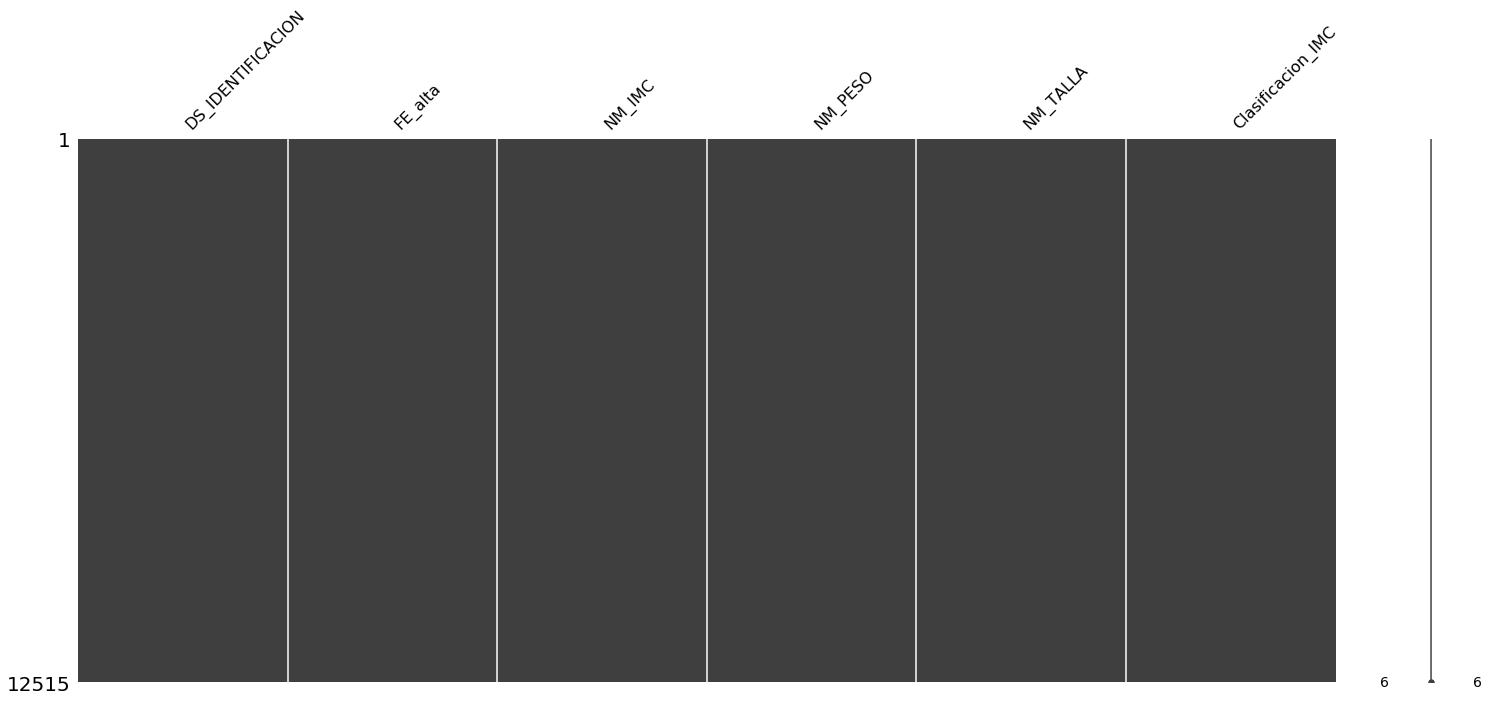

In [75]:
msno.matrix(height_weight)

### Vaccines

In [76]:
vaccines.head()

,Numero_de_documento,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada
0,845676,2018-01-29,Bogota,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1
1,686768,2018-05-20,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
2,1790062,2018-06-05,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1
3,1142931,2018-01-10,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z759,PROBLEMA NO ESPECIFICADO RELACIONADO CON SERVI...,1
4,1734917,2018-06-06,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,1


In [77]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
Numero_de_documento          264 non-null int64
Fecha_Emision                264 non-null datetime64[ns]
Regional_EPS_Desc            264 non-null object
Codigo_Prestacion_Op         264 non-null object
Descripcion_Prestacion       264 non-null object
Codigo_Diagnostico_EPS_Op    264 non-null object
Diagnostico_EPS_Desc         264 non-null object
Cantidad_Autorizada          264 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 16.6+ KB


In [78]:
vaccines.describe(include='all')

,Numero_de_documento,Fecha_Emision,Regional_EPS_Desc,Codigo_Prestacion_Op,Descripcion_Prestacion,Codigo_Diagnostico_EPS_Op,Diagnostico_EPS_Desc,Cantidad_Autorizada
count,2.640000e+02,264,264,264,264,264,264,264.0
unique,NaN,170,6,12,8,15,15,NaN
top,NaN,2019-06-05 00:00:00,Medellin,S1120191,VACUNA PAI INFLUENZA NIÑOS/AS MAYORES DE 9 AÑOS,Z251,NECESIDAD DE INMUNIZACIÓN CONTRA LA INFLUENZA ...,NaN
freq,NaN,6,219,110,242,196,196,NaN
first,NaN,2018-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-05-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.222966e+06,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,4.297377e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,5.005470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,8.442592e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.0


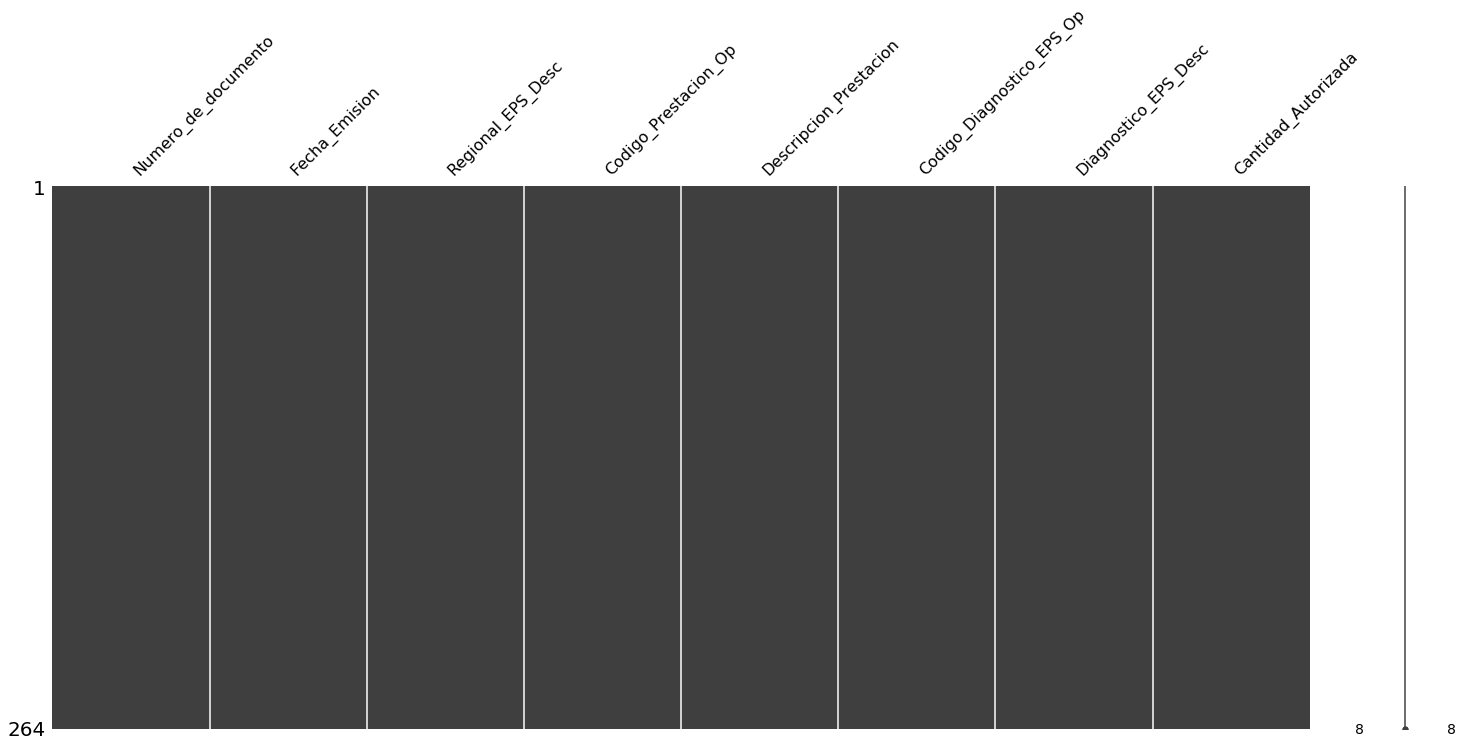

In [79]:
msno.matrix(vaccines)